<a href="https://colab.research.google.com/github/tiwars10/Analytics/blob/master/tweepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df=pd.read_csv('tweets.csv')
df.head(5)

,Unnamed: 0,Tweets
0,0,'PM @narendramodi will create more efficiency ...
1,1,The central government had no outstanding #loa...
2,2,Why Modi government 2.0 might have to change i...
3,3,@BhavikaKapoor5 Whenever and wherever the gove...
4,4,India’s growth rate ‘much weaker than expected...


In [0]:
tweets_text=df.Tweets

In [31]:
tweets_text[0:5]

0    'PM @narendramodi will create more efficiency ...
1    The central government had no outstanding #loa...
2    Why Modi government 2.0 might have to change i...
3    @BhavikaKapoor5 Whenever and wherever the gove...
4    India’s growth rate ‘much weaker than expected...
Name: Tweets, dtype: object

In [0]:
corpus=[]

In [0]:
ps=PorterStemmer()

In [0]:
stop_words=set(stopwords.words('english'))

In [0]:
for i in range (0,1000):
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+0)|([^0-9A-Za-z\t])|(\w+:\/\/\S+)|[0-9]",' ',tweets_text[i])
  tweets_text_cln=tweets_text_cln.lower()
  tweets_text_cln=tweets_text_cln.split()
  tweets_text_cln=[x for x in tweets_text_cln if not x in stop_words]
  tweets_text_cln=" ".join(tweets_text_cln)
  corpus.append(tweets_text_cln)

In [56]:
corpus[0:5]

['pm narendramodi create efficiency economy markmobiusreal',
 'central government outstanding loans week earlier well',
 'modi government might change political economy script via httweets',
 'bhavikakapoor whenever wherever government start depending corrupt businessmen overall health',
 'india growth rate much weaker expected imf imf internationalmonetaryfund imfnews imfspokesperson']

In [0]:
bagofwords=[]
for i in range(0,1000):
  words=corpus[i].split()
  bagofwords.append(words)

In [58]:
bagofwords[0]

['pm', 'narendramodi', 'create', 'efficiency', 'economy', 'markmobiusreal']

In [59]:
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most Commonly Occuring words and frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'narendramodi', 'create', 'efficiency', 'economy', 'markmobiusreal', 'central', 'government', 'outstanding', 'loans']

Most Commonly Occuring words and frequency



[('india', 596),
 ('economy', 428),
 ('indian', 68),
 ('modi', 66),
 ('growth', 61),
 ('amp', 61),
 ('much', 48),
 ('economic', 48),
 ('trillion', 46),
 ('pakistan', 45),
 ('narendramodi', 43),
 ('imf', 40),
 ('world', 38),
 ('govt', 38),
 ('government', 37),
 ('via', 37),
 ('nsitharaman', 37),
 ('expected', 36),
 ('people', 36),
 ('one', 36)]

In [0]:
words_to_remove=['india', 'economy','indian','much','amp']
bagofwords_new=[[x for x in  word if not  x in words_to_remove] for word in bagofwords]

In [61]:
all_words=list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("Most Commonly Occuring words and frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'narendramodi', 'create', 'efficiency', 'markmobiusreal', 'central', 'government', 'outstanding', 'loans', 'week']

Most Commonly Occuring words and frequency



[('modi', 66),
 ('growth', 61),
 ('economic', 48),
 ('trillion', 46),
 ('pakistan', 45),
 ('narendramodi', 43),
 ('imf', 40),
 ('world', 38),
 ('govt', 38),
 ('government', 37),
 ('via', 37),
 ('nsitharaman', 37),
 ('expected', 36),
 ('people', 36),
 ('one', 36),
 ('billion', 34),
 ('minister', 33),
 ('weaker', 32),
 ('gdp', 32),
 ('slowdown', 31)]

In [64]:
freq_word_df=pd.DataFrame(words_freq.most_common(20),columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,modi,66
1,growth,61
2,economic,48
3,trillion,46
4,pakistan,45


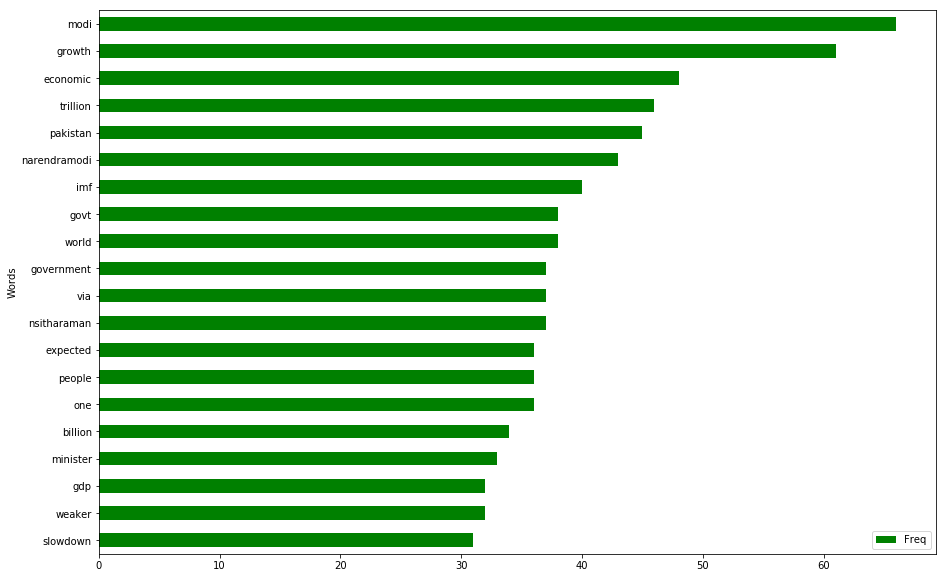

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words',y='Freq',ax=ax, color='green')
plt.show();

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords=STOPWORDS, 
                      background_color='black',
                       max_words=20
                       ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

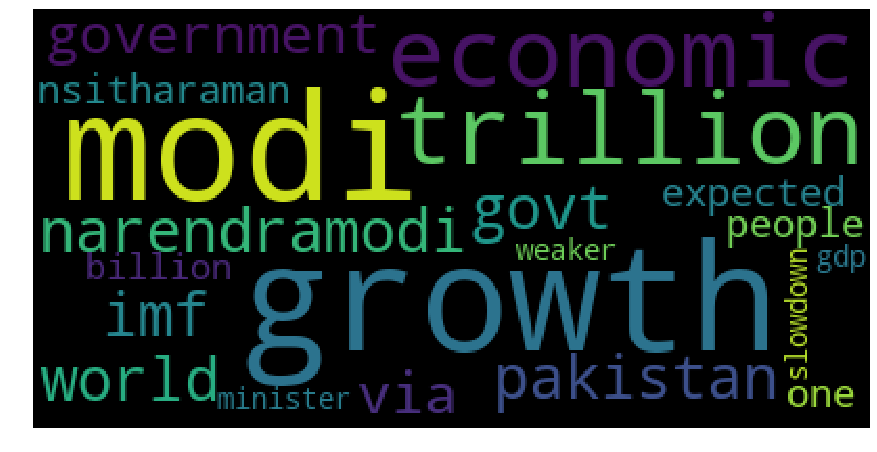

In [79]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [80]:
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending=False)

0.0
pm narendramodi create efficiency economy markmobiusreal


,Polarity,Tweet_Text
941,1.000000,itc best company india going economy india fin...
424,1.000000,nandtara best please vote bjp coming election ...
993,1.000000,thinking india economy rising excellent
131,1.000000,even indian gdp grows cagr would awesome india...
321,1.000000,feeling concerned economy government india try...
56,0.933333,rsprasad india must determine best economy bil...
54,0.900000,piyushgoyal narendramodi india must determine ...
513,0.800000,josephnceba njabulo mkholo africafactszone lol...
129,0.800000,great think india become great economy
922,0.800000,god bless india great country whose pm modi mu...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ad59a0f60>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on India Economy')

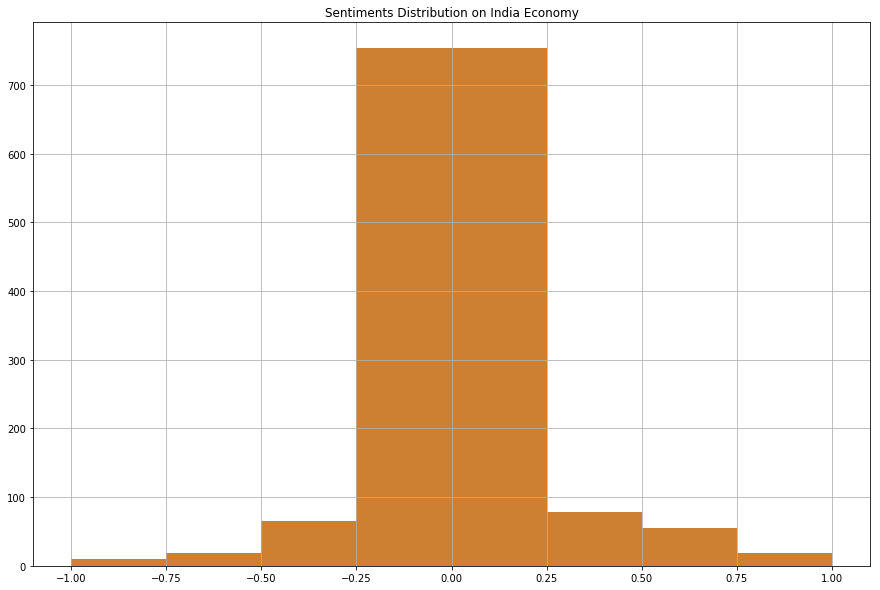

In [81]:
# Plot sentiment of tweets in the form of Histogram

fig,ax=plt.subplots(figsize=(15,10))

#plot histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax=ax,color="#CD7F32")
plt.title("Sentiments Distribution on India Economy")
plt.show()